In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df_train = pd.read_csv('../data/train.csv')

In [4]:
# Explore the dataset
# Display the first few rows of the dataset
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15713774.0,Hsieh,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1.0
1,1,15682533.0,Hs?eh,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0.0
2,2,15791550.0,Tsou,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0.0
3,3,15762762.0,Chiawuotu,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0.0
4,4,15756475.0,Nnamdi,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0.0


In [5]:
# Display the shape of the dataset
df_train.shape

(15000, 14)

In [6]:
# Display the data types of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [7]:
# Display the percentage of missing values in each column
df_train.isna().mean()*100  

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [8]:
# Display the sum of duplicated 
df_train.duplicated().sum()

0

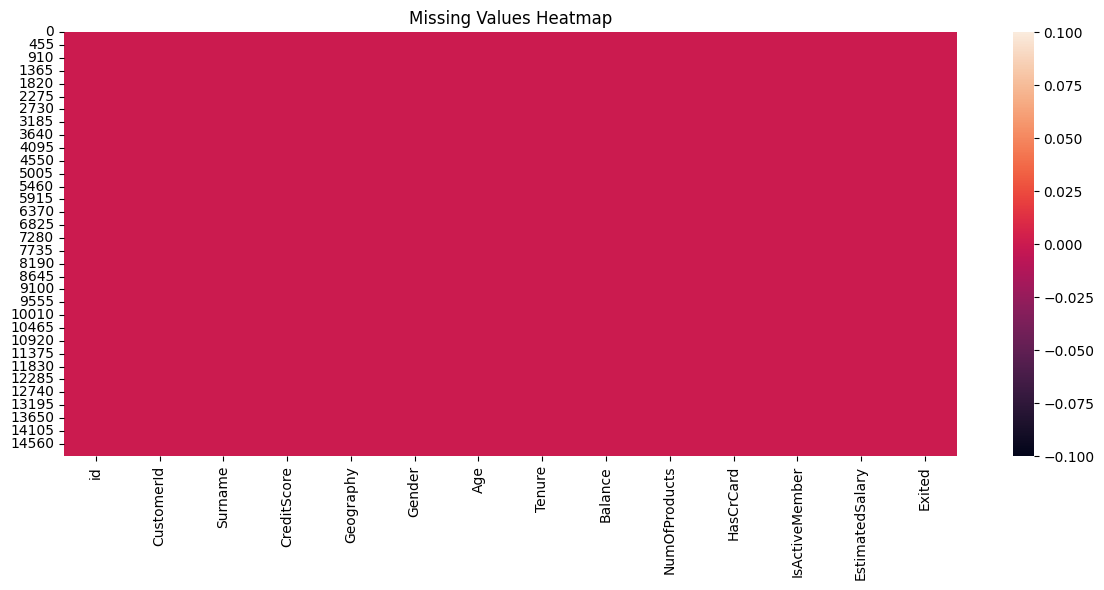

In [9]:
# Visualize missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=True)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [10]:
# Select Target variable
Y = df_train['Exited']
df_train.drop(columns=['Exited'], inplace=True)

In [11]:
df_train.drop(['id','Surname'],axis=1, inplace=True)

In [12]:
# Select numerical variables
var_num = df_train.select_dtypes(include=['int', 'float'])

In [13]:
var_num.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [14]:
# Display descriptive statistics for numerical variables
var_num.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.570073e+07,658.701800,37.660800,5.038800,42888.826095,1.589467,0.779800,0.497867,117892.175400
std,1.162730e+06,80.238346,8.106408,2.810354,59695.877791,0.532430,0.414395,0.500012,45574.462515
min,1.557151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563387e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82870.750000
50%,1.569018e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123583.850000
75%,1.575972e+07,709.000000,42.000000,7.000000,109844.810000,2.000000,1.000000,1.000000,157567.370000
max,1.562648e+08,4818.000000,72.000000,10.000000,207034.960000,6.000000,1.000000,1.000000,199761.290000


In [15]:
# Select categorical variables
var_cat = df_train.select_dtypes(include=['object','category'])

In [16]:
var_cat.columns

Index(['Geography', 'Gender'], dtype='object')

In [17]:
var_cat.nunique()

Geography    3
Gender       2
dtype: int64

In [37]:
# Display descriptive statistics for categorical variables
var_cat.describe()

,Geography,Gender
count,15000,15000
unique,3,2
top,France,Male
freq,9048,8422


-----
Visualization
-----

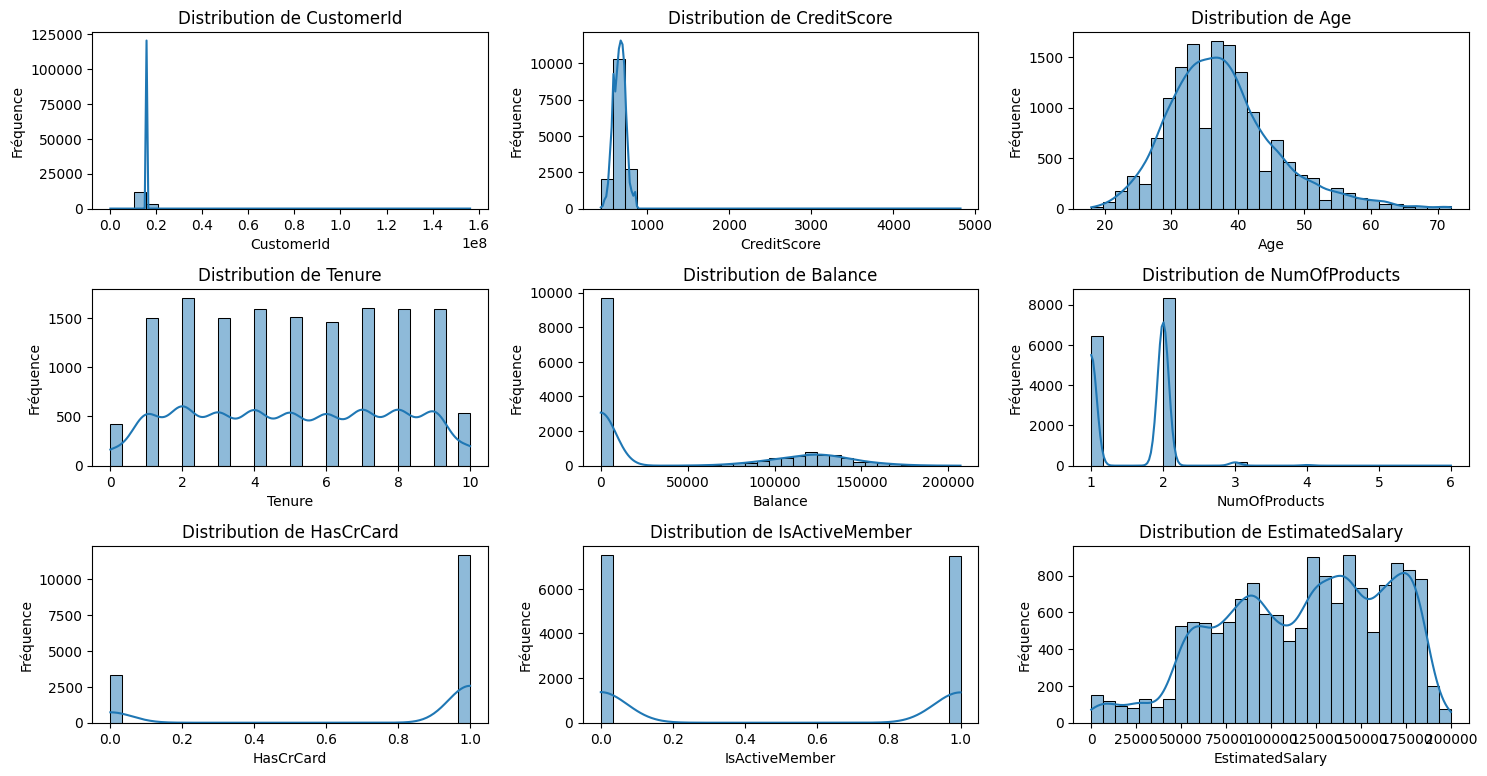

In [35]:
# Display distribution of numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(var_num, 1):
    plt.subplot(4, 3, i)  # 3 lignes, 2 colonnes
    sns.histplot(var_num[column], kde=True, bins=30)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

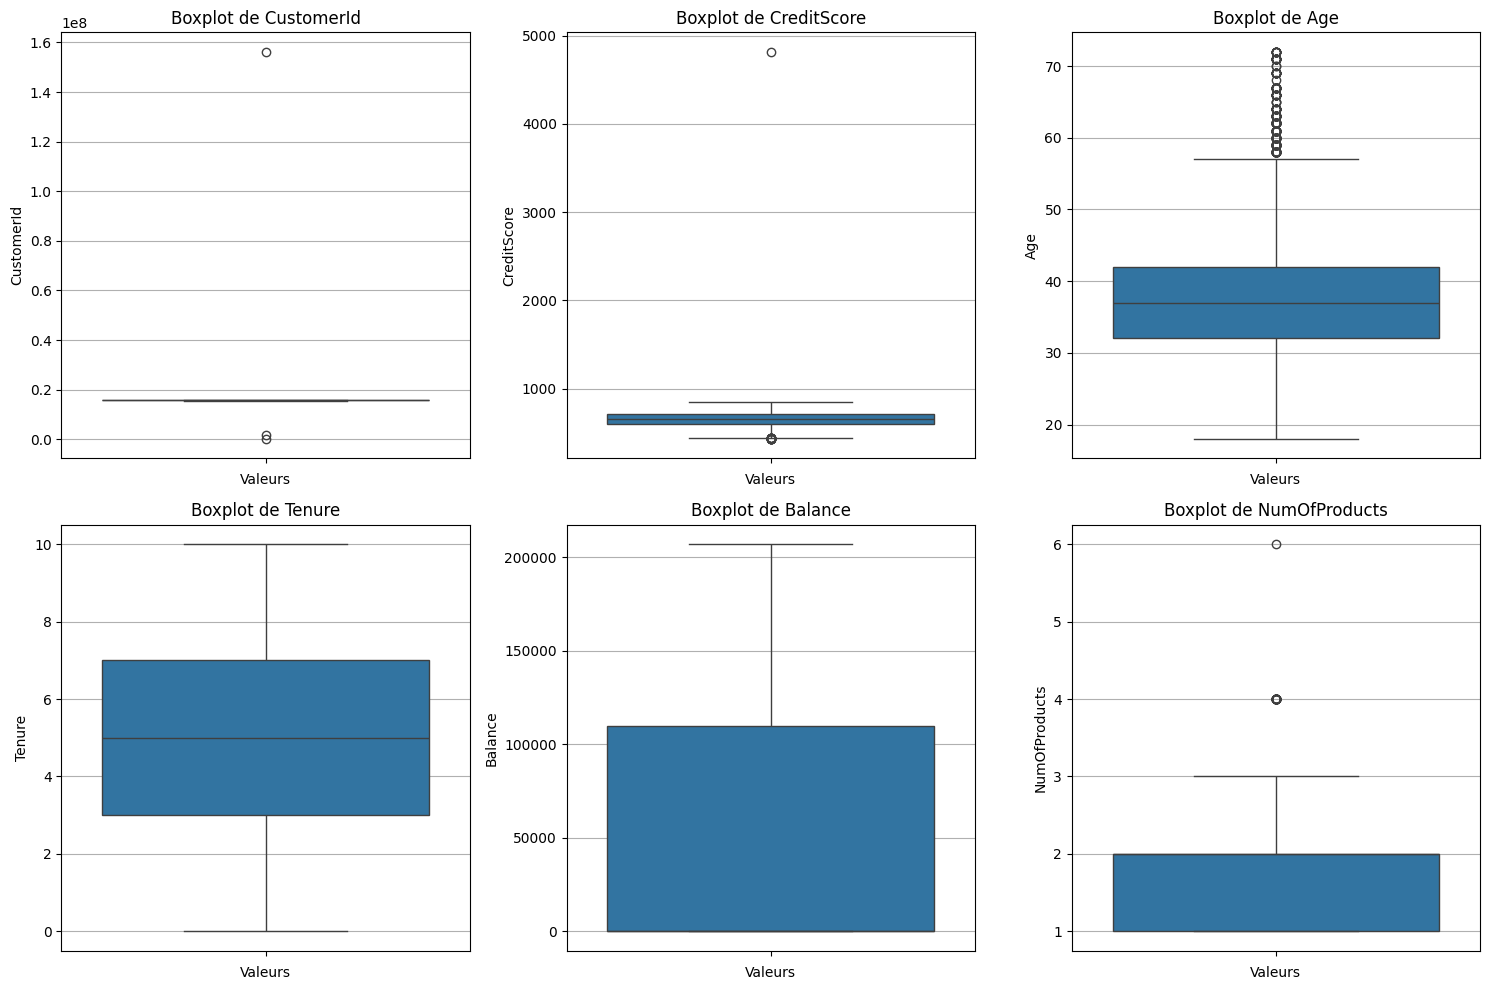

In [36]:
# Boxplot des variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), var_num):
    sns.boxplot(y=df_train[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

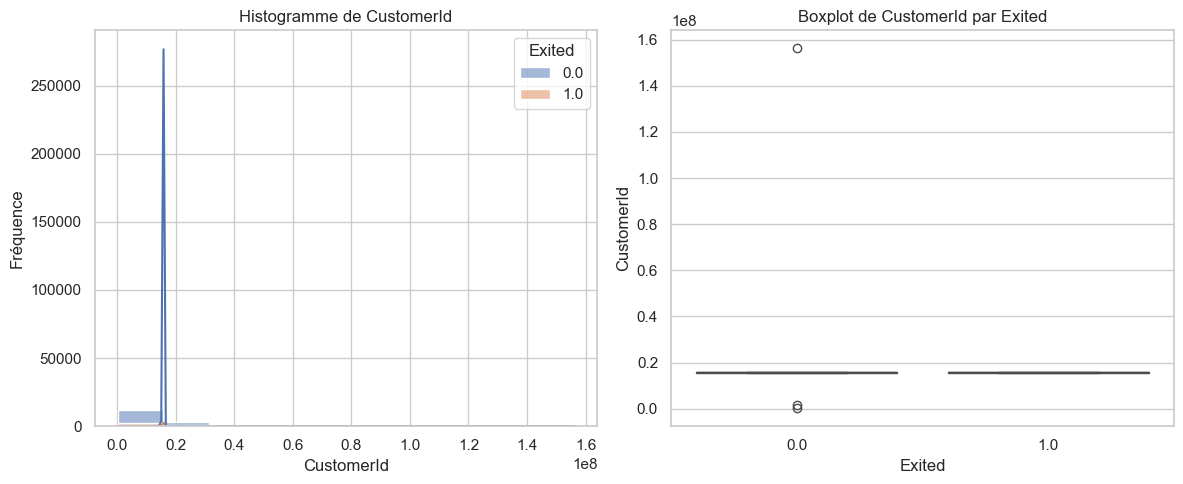

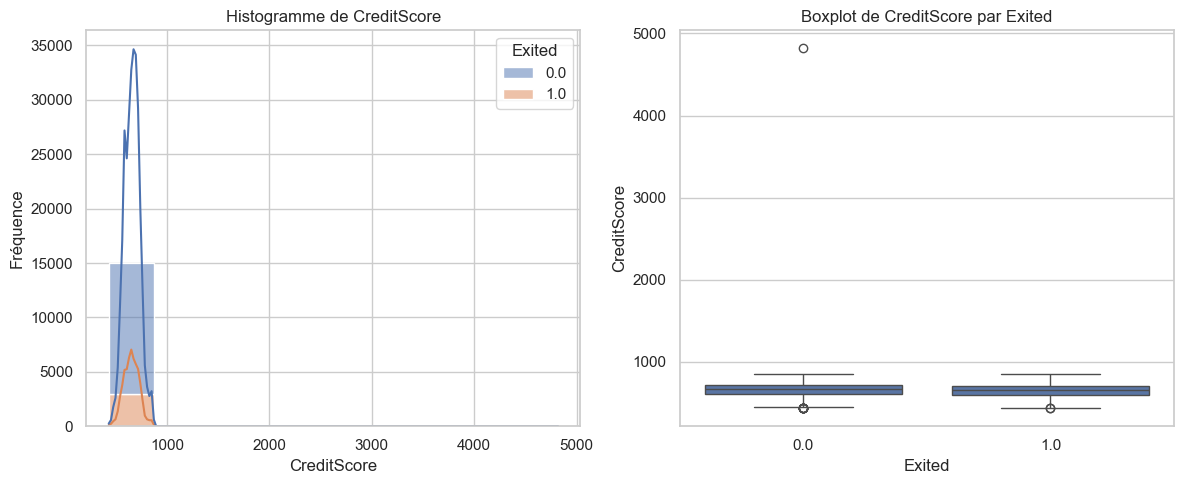

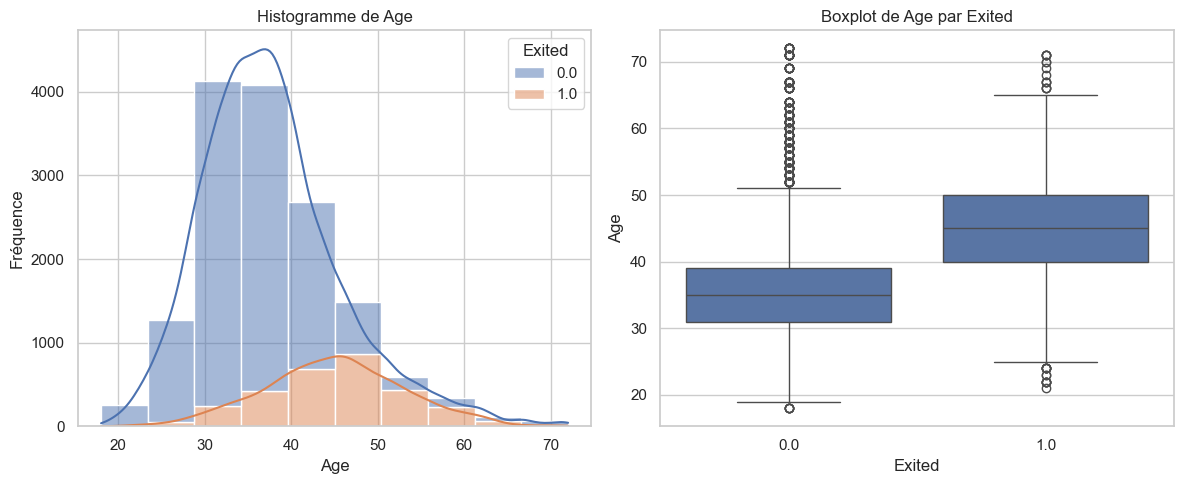

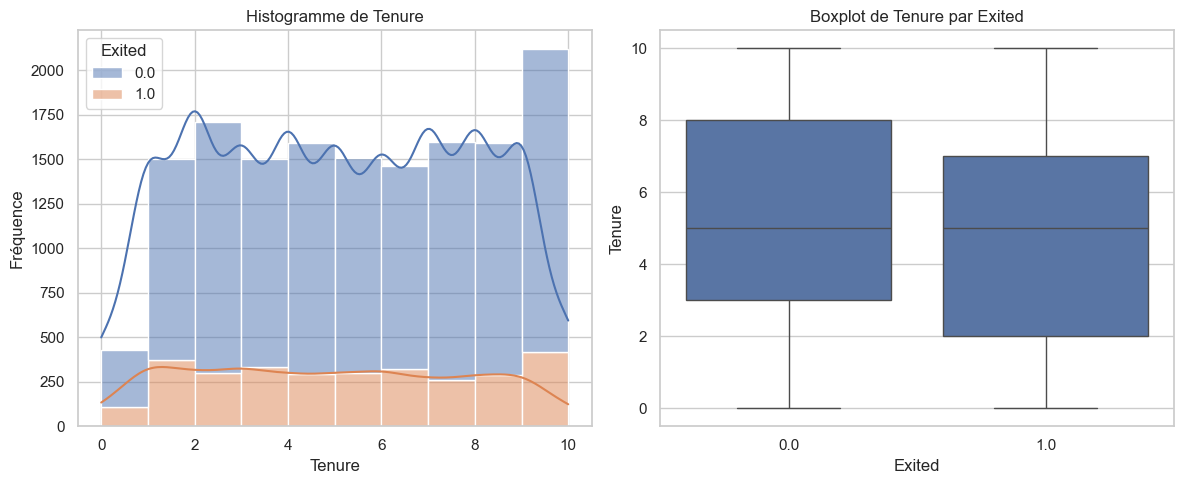

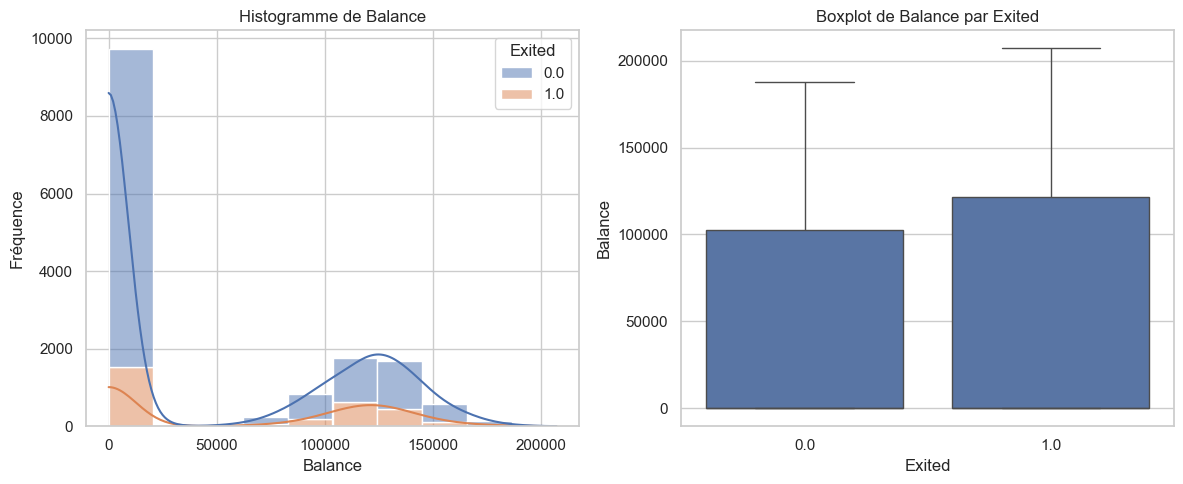

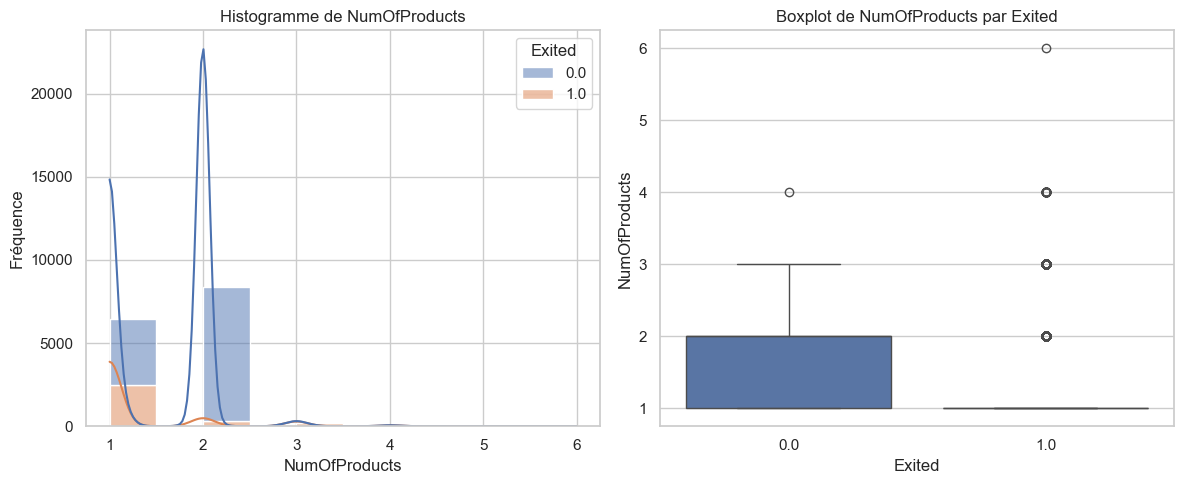

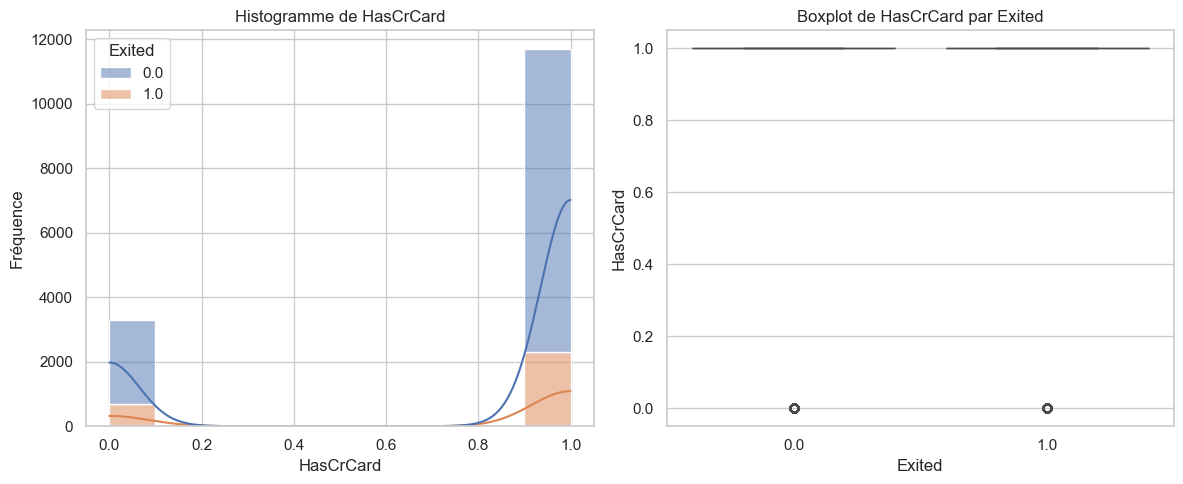

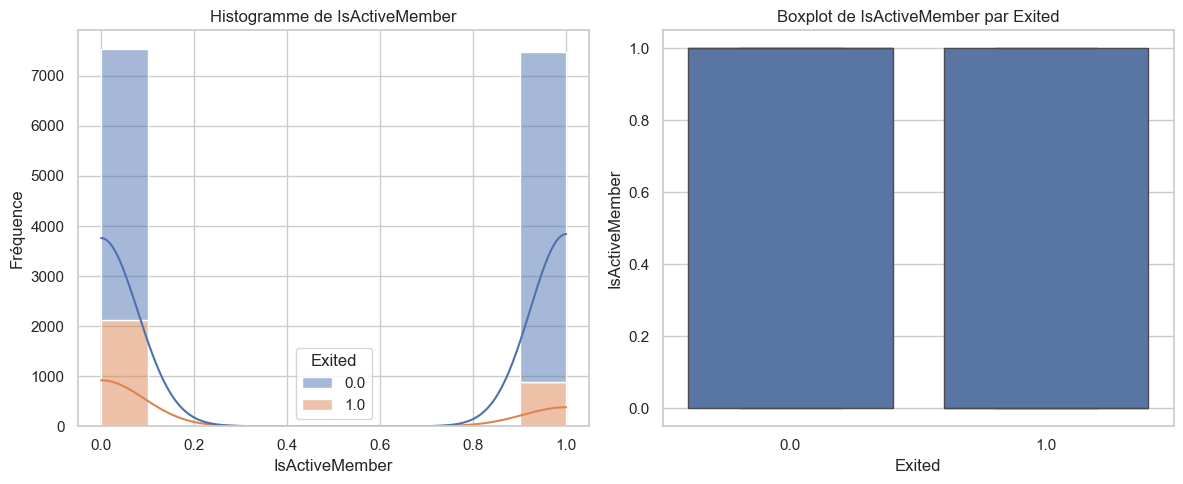

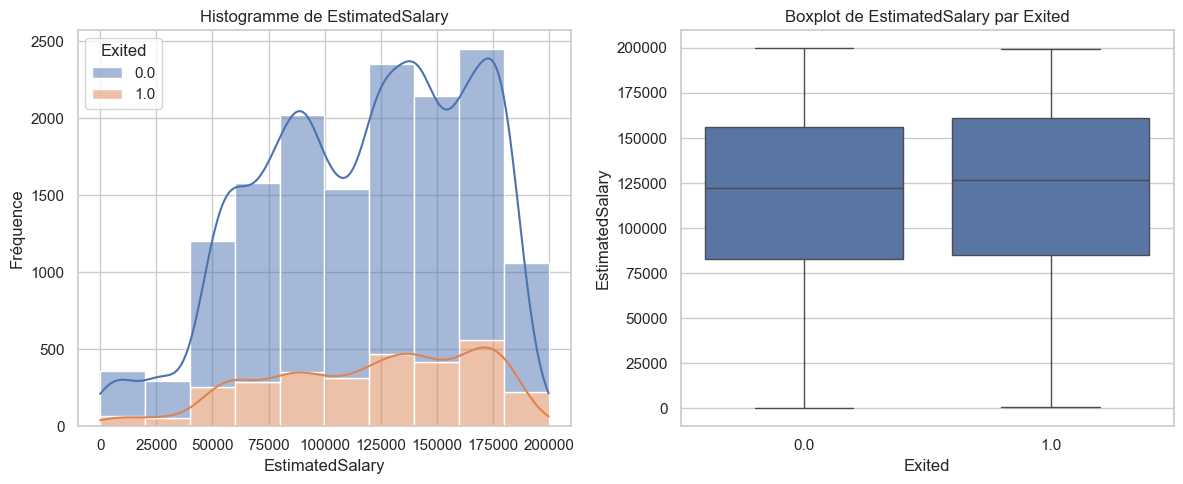

In [43]:
# Distribution des variables en fonction de la target
sns.set(style="whitegrid")

# Tracer un histogramme et un boxplot pour chaque variable numérique
for feature in var_num:
    plt.figure(figsize=(12, 5))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df_train, x=feature, hue=Y, multiple="stack", bins=10, kde=True)
    plt.title(f'Histogramme de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Y, y=feature, data=df_train)
    plt.title(f'Boxplot de {feature} par Exited')
    plt.xlabel('Exited')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

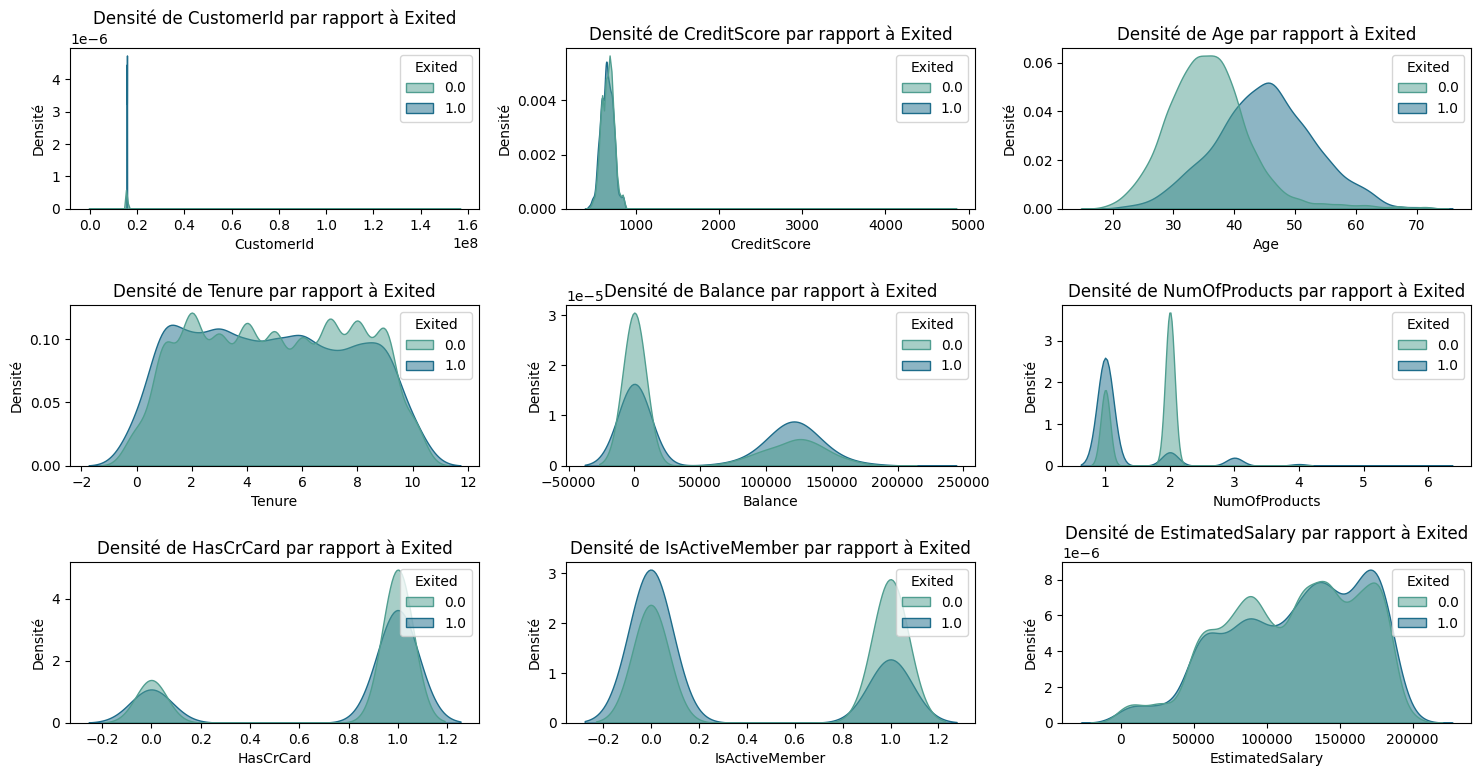

In [39]:
# Focus sur la densité des variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(var_num.columns, 1):
    plt.subplot(4, 3, i)
    # Create a temporary DataFrame with the column and target variable
    temp_df = pd.DataFrame({column: df_train[column], 'Exited': Y})
    sns.kdeplot(data=temp_df, x=column, hue='Exited', common_norm=False, fill=True, palette='crest', alpha=0.5)
    plt.title(f'Densité de {column} par rapport à Exited')
    plt.xlabel(column)
    plt.ylabel('Densité')

plt.tight_layout()
plt.show()


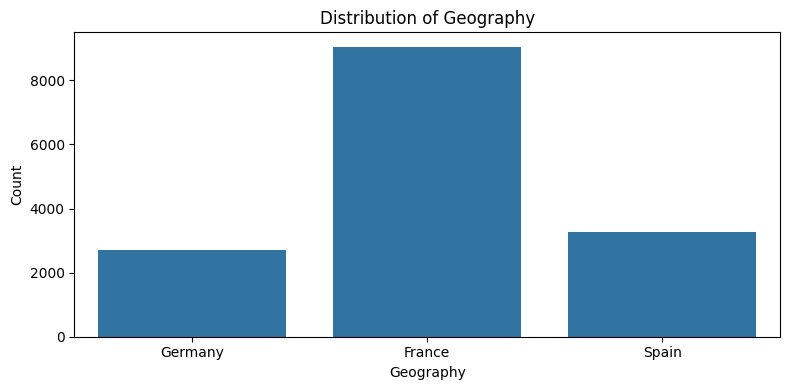

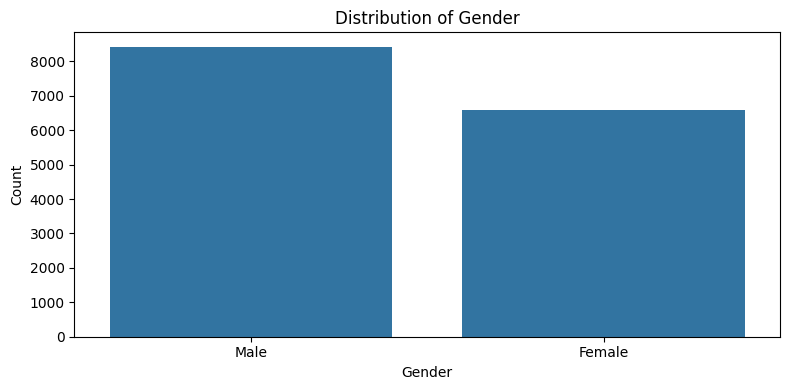

In [21]:
# display distribution of categorical variables
for col in var_cat.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var_cat[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

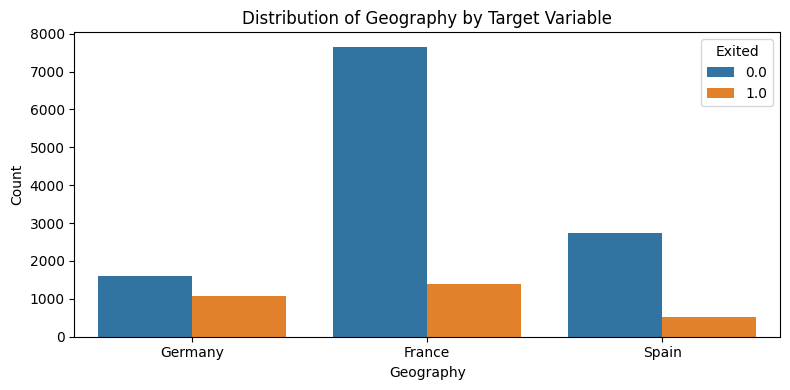

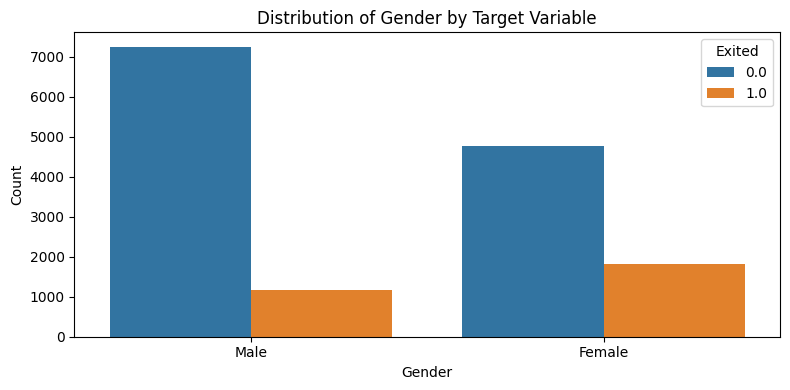

In [22]:
# display target vs categorical variables
for col in var_cat.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var_cat[col], hue=Y)
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

-----
Analysis
-----

In [24]:
Y.value_counts()

Exited
0.0    12010
1.0     2990
Name: count, dtype: int64

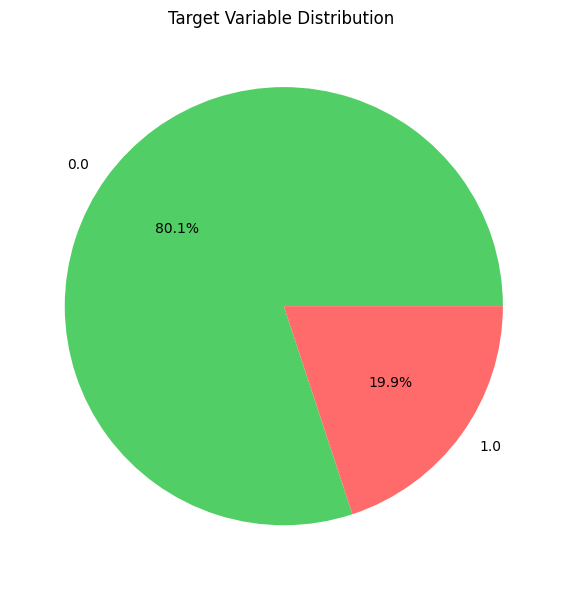

In [25]:
# Visualize target variable distribution
plt.figure(figsize=(8, 6))
Y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#51cf66', '#ff6b6b'])
plt.title('Target Variable Distribution ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [26]:
# Average EstimatedSalary by Geography and Gender
df_train.groupby(['Geography','Gender'])['EstimatedSalary'].mean()

Geography  Gender
France     Female    117040.450698
           Male      117872.360148
Germany    Female    121082.772628
           Male      117933.927200
Spain      Female    118005.425425
           Male      117477.840339
Name: EstimatedSalary, dtype: float64

In [27]:
# Average Age by Geography and Gender
df_train.groupby(['Geography','Gender'])['Age'].mean()

Geography  Gender
France     Female    37.785223
           Male      36.680851
Germany    Female    40.270767
           Male      39.085239
Spain      Female    37.972877
           Male      36.998922
Name: Age, dtype: float64

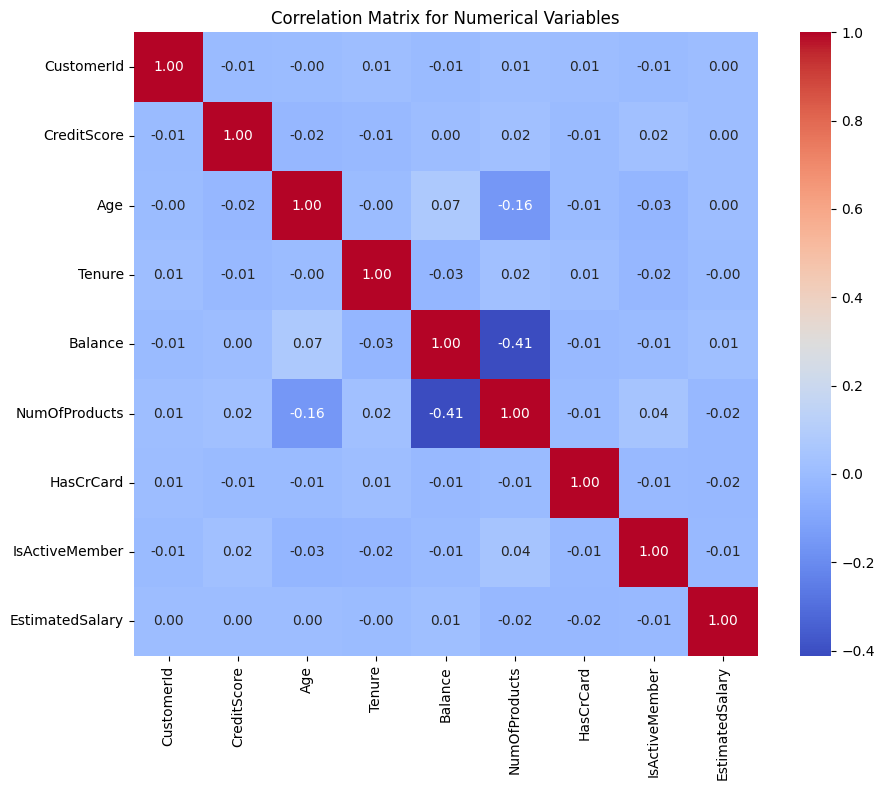

In [28]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
corr = var_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numerical Variables')
plt.tight_layout()
plt.show()

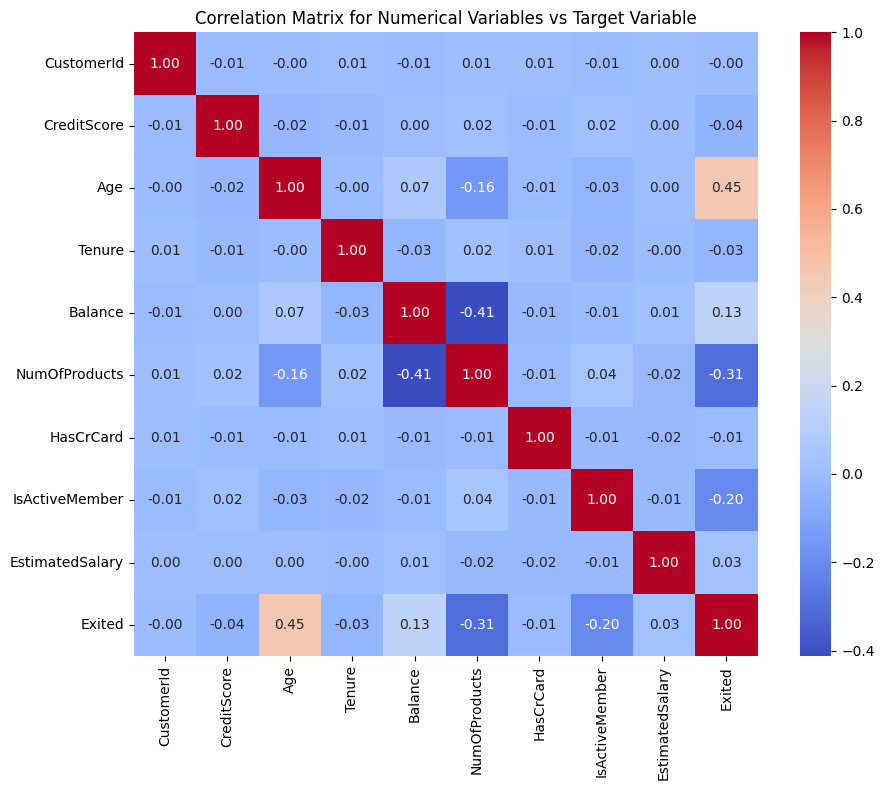

In [29]:
# Correlation matrix for numerical variables vs target variable
plt.figure(figsize=(10, 8)) 
corr_target = var_num.copy()
corr_target['Exited'] = Y
corr = corr_target.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numerical Variables vs Target Variable')
plt.tight_layout()
plt.show()

In [30]:
var_cat.columns

Index(['Geography', 'Gender'], dtype='object')

In [31]:
# P-value matrix for categorical variables
from scipy.stats import chi2_contingency

# Ensure `var_cat` contains column names (not the DataFrame itself)
cat_cols = list(var_cat.columns) if hasattr(var_cat, 'columns') else list(var_cat)

p_values = pd.Series(index=cat_cols, dtype=float)

for col in cat_cols:
    contingency_table = pd.crosstab(df_train[col], Y)
    try:
        # If table is degenerate (only one row/col) chi2 isn't defined
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            p = np.nan
        else:
            _, p, _, _ = chi2_contingency(contingency_table)
    except Exception:
        p = np.nan
    p_values.loc[col] = p

# Convert to DataFrame, sort and display
p_values_df = p_values.to_frame(name='p_value').sort_values('p_value')

# Add a simple significance column for convenience
p_values_df['significant_0.05'] = p_values_df['p_value'] < 0.05

p_values_df


,p_value,significant_0.05
Geography,4.250488e-182,True
Gender,4.411015e-95,True


In [45]:
import scipy.stats as stats
from scipy.stats import shapiro
# Appliquer le test de Shapiro-Wilk sur toutes les colonnes numériques de train
for column in df_train.select_dtypes(include=['float64', 'int64']).columns:
    data = df_train[column]
    stat, p_value = shapiro(data)
    print(f"Test Shapiro-Wilk pour {column} : Stat={stat}, p-value={p_value}")

    if p_value > 0.05:
        print(f"{column}: Les données suivent une loi normale.")
    else:
        print(f"{column}: Les données ne suivent pas une loi normale.")

Test Shapiro-Wilk pour CustomerId : Stat=0.010067999362945557, p-value=0.0
CustomerId: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour CreditScore : Stat=0.8424898982048035, p-value=0.0
CreditScore: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour Age : Stat=0.9634302854537964, p-value=0.0
Age: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour Tenure : Stat=0.9479401111602783, p-value=0.0
Tenure: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour Balance : Stat=0.6805902719497681, p-value=0.0
Balance: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour NumOfProducts : Stat=0.6804039478302002, p-value=0.0
NumOfProducts: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour HasCrCard : Stat=0.5109149217605591, p-value=0.0
HasCrCard: Les données ne suivent pas une loi normale.
Test Shapiro-Wilk pour IsActiveMember : Stat=0.6365152597427368, p-value=0.0
IsActiveMember: Les données ne suivent p

c:\Users\CYTech Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
